## Install Packages

In [2]:
!pip install ucimlrepo

## Import Libraries

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score


## Assign Independant and dependant variables

In [4]:
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

## Data Exploration

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [7]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
y.describe()


,income
count,48842
unique,4
top,<=50K
freq,24720


##

In [9]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [10]:
y.head(10)

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


## Preprocess the data

In [11]:
print(y['income'].unique())
y = y.replace({'<=50K.':'<=50K','>50K.':'>50K'})
print(y['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']
['<=50K' '>50K']


In [12]:
X.replace('?',np.NaN,inplace=True)
print(X.columns[X.isna().any()])
X = X.drop(columns=['fnlwgt','education-num','relationship','race','capital-gain','capital-loss','sex'])

Index(['workclass', 'occupation', 'native-country'], dtype='object')


<ipython-input-12-1bd628b46a57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?',np.NaN,inplace=True)


In [13]:
mode_workclass = X['workclass'].mode()[0]
X['workclass'] = X['workclass'].fillna(mode_workclass)

mode_occupation = X['occupation'].mode()[0]
X['occupation'] = X['occupation'].fillna(mode_occupation)

mode_country = X['native-country'].mode()[0]
X['native-country'] = X['native-country'].fillna(mode_country)

X = X.replace(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th","11th", "12th"],'School', regex=True)
X = X.replace(["Some-college", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc"],'Higher',regex=True)


### **Plot Age Vs Income**

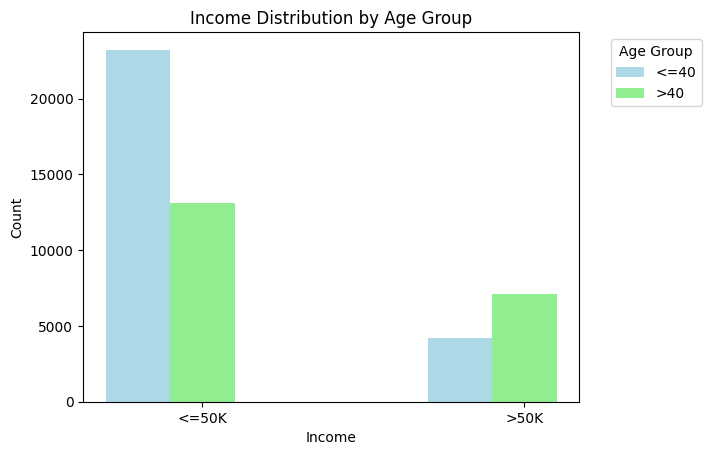

In [14]:
age_less_than_or_equal_forty = {'<=50K': 0, '>50K': 0}
age_greater_than_forty = {'<=50K': 0, '>50K': 0}

# Count occurrences of income within each age group
for age, income in zip(X['age'], y['income']):
    if age < 40:
        age_less_than_or_equal_forty[income] += 1
    elif age > 40:
        age_greater_than_forty[income] += 1

# Plotting the bar plot
plt.bar([0.8, 1.8], age_less_than_or_equal_forty.values(), width=0.2, label='<=40', color='lightblue')
plt.bar([1.0, 2.0], age_greater_than_forty.values(), width=0.2, label='>40', color='lightgreen')

# Adding labels and titles
plt.title('Income Distribution by Age Group')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([1, 2], ['<=50K', '>50K'])
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Plot Education Vs Income

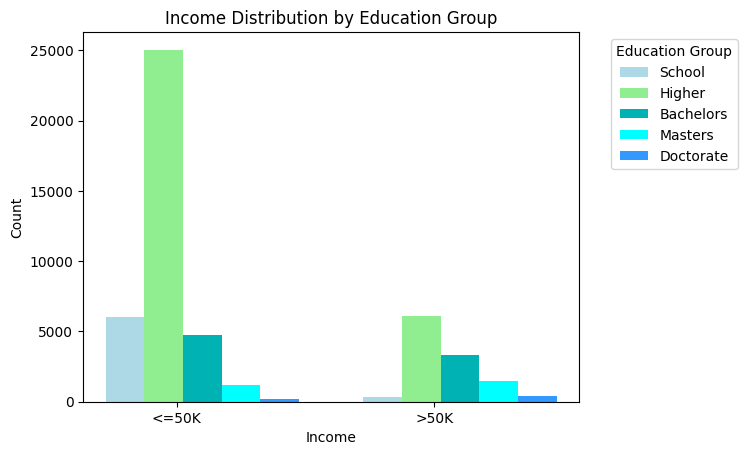

In [15]:
School = {'<=50K': 0, '>50K': 0}
Higher = {'<=50K': 0, '>50K': 0}
Bachelors = {'<=50K': 0, '>50K': 0}
Masters = {'<=50K': 0, '>50K': 0}
Doctorate = {'<=50K': 0, '>50K': 0}


# Count occurrences of income within each age group
for edu, income in zip(X['education'], y['income']):
    if edu == 'School':
        School[income] += 1
    elif edu == 'Higher':
        Higher[income] += 1
    elif edu == 'Bachelors':
      Bachelors[income] += 1
    elif edu == 'Masters':
      Masters[income] += 1
    elif edu == 'Doctorate':
      Doctorate[income] += 1


# Plotting the bar plot
plt.bar([0.8, 1.8], School.values(), width=0.15, label='School', color='lightblue')
plt.bar([0.95, 1.95], Higher.values(), width=0.15, label='Higher', color='lightgreen')
plt.bar([1.1, 2.1], Bachelors.values(), width=0.15, label='Bachelors', color='#00B2B3')
plt.bar([1.25, 2.25], Masters.values(), width=0.15, label='Masters', color='cyan')
plt.bar([1.4, 2.4], Doctorate.values(), width=0.15, label='Doctorate', color='#3399FF')


# Adding labels and titles
plt.title('Income Distribution by Education Group')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([1, 2], ['<=50K', '>50K'])
plt.legend(title='Education Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [16]:
print(X['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


In [17]:
label_encoder = LabelEncoder()

X['workclass'] = label_encoder.fit_transform(X['workclass'])
mapping_workclass = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

custom_education = {'School':0,'Higher':1,'Bachelors':2,'Masters':3,'Doctorate':4}
X['education'] = X['education'].replace(custom_education)

X['marital-status'] = label_encoder.fit_transform(X['marital-status'])
mapping_marital_status = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

X['occupation'] = label_encoder.fit_transform(X['occupation'])
mapping_occupation = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

X['native-country'] = label_encoder.fit_transform(X['native-country'])
mapping_country = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

mapping_income = {'<=50K':0,'>50K':1}
y['income'] = y['income'].replace(mapping_income)


In [18]:
X.head(10)

,age,workclass,education,marital-status,occupation,hours-per-week,native-country
0,39,6,2,4,0,40,38
1,50,5,2,2,3,13,38
2,38,3,1,0,5,40,38
3,53,3,0,2,5,40,38
4,28,3,2,2,9,40,4
5,37,3,3,2,3,40,38
6,49,3,0,3,7,16,22
7,52,5,1,2,3,45,38
8,31,3,3,4,9,50,38
9,42,3,2,2,3,40,38


In [19]:
y.head(10)

,income
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("No of train samples:",X_train.shape[0])
print("No of test samples:",X_test.shape[0])

No of train samples: 39073
No of test samples: 9769


In [21]:
rfr_model = RandomForestClassifier(max_depth=12,random_state=42)
rfr_model.fit(X_train,y_train)

rfr_train_prediction = rfr_model.predict(X_train)
rfr_train_accuracy = accuracy_score(y_train,rfr_train_prediction)
print("Train Accuracy:", rfr_train_accuracy)

rfr_prediction = rfr_model.predict(X_test)
rfr_test_accuracy = accuracy_score(y_test,rfr_prediction)
print("Test Accuracy:", rfr_test_accuracy)

print(classification_report(y_test, rfr_prediction))

<ipython-input-21-4b75ce95adf7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_train,y_train)


Train Accuracy: 0.8569344560182223
Test Accuracy: 0.8364213327873887
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7414
           1       0.72      0.52      0.61      2355

    accuracy                           0.84      9769
   macro avg       0.79      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769



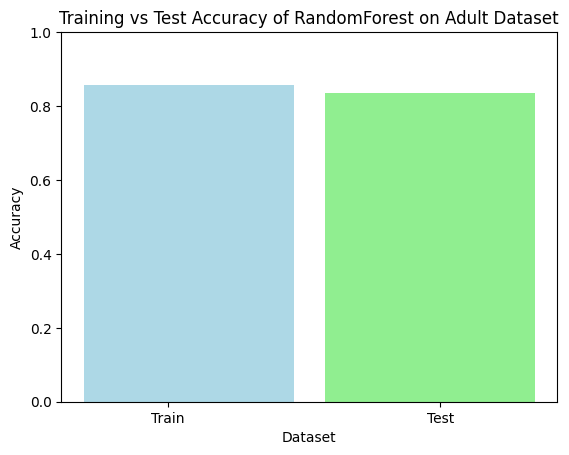

In [44]:
plt.bar([0.9, 1.13], [rfr_train_accuracy, rfr_test_accuracy], width=0.2, color=['lightblue', 'lightgreen'])
plt.title('Training vs Test Accuracy of RandomForest on Adult Dataset')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks([.88, 1.14], ['Train', 'Test'])
plt.ylim(0, 1)
plt.show()

In [23]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

nb_train_prediction = nb_classifier.predict(X_train)
nb_train_accuracy = accuracy_score(y_train,nb_train_prediction)
print('Train Accuracy',nb_train_accuracy)

nb_test_prediction = nb_classifier.predict(X_test)
nb_test_accuracy = accuracy_score(y_test, nb_test_prediction)
print("Test Accuracy:", nb_test_accuracy)

print(classification_report(y_test, nb_test_prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy 0.8033936477874747
Test Accuracy: 0.8035622888729655
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7414
           1       0.63      0.45      0.53      2355

    accuracy                           0.80      9769
   macro avg       0.73      0.68      0.70      9769
weighted avg       0.79      0.80      0.79      9769



In [ ]:
plt.bar([0.9, 1.13], [nb_train_accuracy, nb_test_accuracy], width=0.2, color=['lightblue', 'lightgreen'])
plt.title('Training vs Test Accuracy of NaiveBayes on Adult Dataset')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks([.88, 1.14], ['Train', 'Test'])
plt.ylim(0, 1)
plt.show()

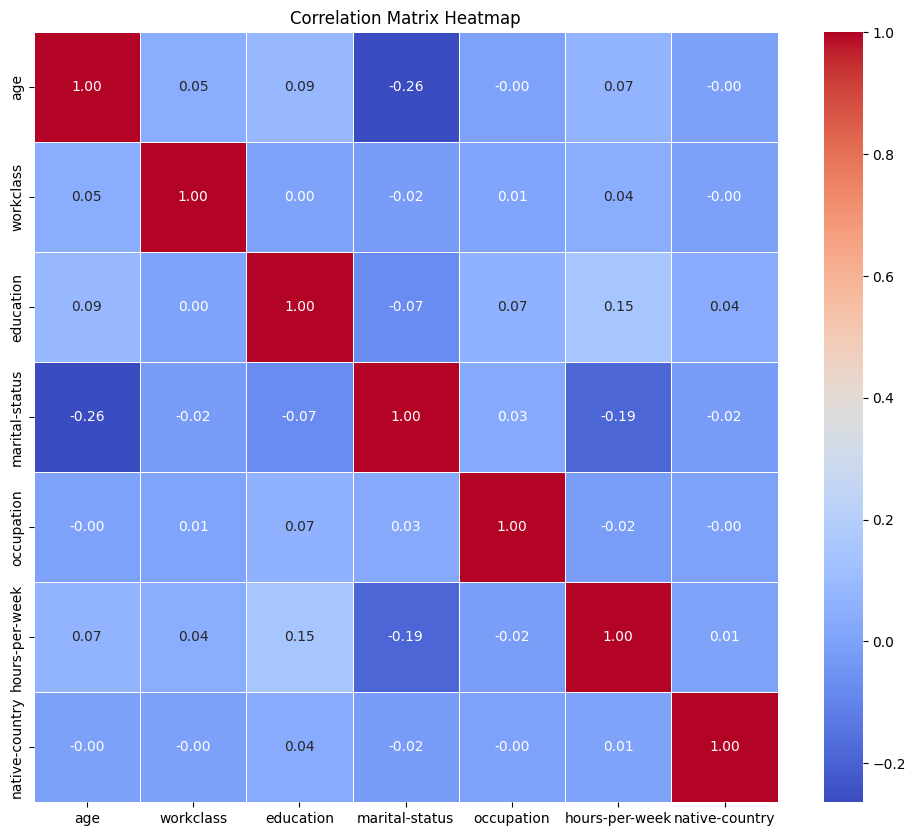

In [24]:
corr = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()